# Cancer Diagnostics

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

col_names = ['sample #', 'clump thickness', 'cell size uniformity', 'cell shape uniformity', 'marginal adhesion', 'single epithelial cell size', 'bare nuclei', 'bland chromatin', 'normal nucleoli', 'mitoses', 'class']
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', names=col_names)

df.head()

,sample #,clump thickness,cell size uniformity,cell shape uniformity,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [16]:
print(df['bare nuclei'].unique())
df = df[df['bare nuclei'] != '?']
print(df['bare nuclei'].unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
['1' '10' '2' '4' '3' '9' '7' '5' '8' '6']


In [17]:
num_benigns = len(df[df['class'] == 2])
num_malignants = len(df[df['class'] == 4])

print(num_benigns, 'Benigns')
print(num_malignants, 'Malignants:')
print('% of Malignants:', 100 * round(num_malignants/(num_benigns + num_malignants), 2), '%')

444 Benigns
239 Malignants:
% of Malignants: 35.0 %


In [18]:
def get_class(x):
    if x == 2:
        return 'benign'
    elif x == 4:
        return 'malignant'
    else:
        return float('NaN')

df['class'] = df['class'].apply(get_class)
print(df['class'].unique())

['benign' 'malignant']


In [19]:
for col in df.columns:
    print(col, ':', df[col].dtype, '-', len(df[col].unique()), 'unique vals')
    
df = df.drop(labels=['sample #'], axis=1)

sample # : int64 - 630 unique vals
clump thickness : int64 - 10 unique vals
cell size uniformity : int64 - 10 unique vals
cell shape uniformity : int64 - 10 unique vals
marginal adhesion : int64 - 10 unique vals
single epithelial cell size : int64 - 10 unique vals
bare nuclei : object - 10 unique vals
bland chromatin : int64 - 10 unique vals
normal nucleoli : int64 - 10 unique vals
mitoses : int64 - 9 unique vals
class : object - 2 unique vals


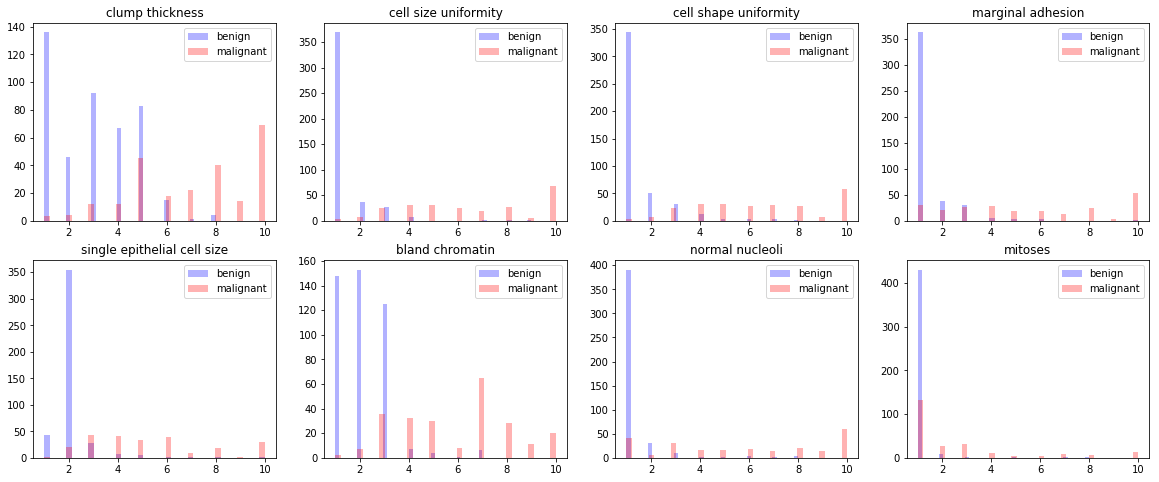

In [21]:
def show_plots(df):
    benigns = df[df['class'] == 'benign']
    malignants = df[df['class'] == 'malignant']

    plt.figure(figsize=(20,8))
    
    for i, col_name in enumerate(['clump thickness', 'cell size uniformity', 'cell shape uniformity', 'marginal adhesion', 'single epithelial cell size', 'bland chromatin', 'normal nucleoli', 'mitoses']):
        plt.subplot(2, 4, i + 1)
        plt.hist(benigns[col_name], bins=40, color='blue', alpha=0.3, label='benign')
        plt.hist(malignants[col_name], bins=40, color='red', alpha=0.3, label='malignant')
        plt.legend()
        plt.title(col_name)
        
        # TBD: NOT SURE WHY 'bare nuclei' DOES NOT WORK
        
    plt.show()
    
show_plots(df)

In [22]:
col_names.remove('sample #')
col_names.remove('class')
df = pd.get_dummies(df, columns=col_names)
df.head()

,class,clump thickness_1,clump thickness_2,clump thickness_3,clump thickness_4,clump thickness_5,clump thickness_6,clump thickness_7,clump thickness_8,clump thickness_9,...,normal nucleoli_10,mitoses_1,mitoses_2,mitoses_3,mitoses_4,mitoses_5,mitoses_6,mitoses_7,mitoses_8,mitoses_10
0,benign,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,benign,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,benign,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,benign,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,benign,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
Y = df['class']
X = df.drop(labels=['class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

## Vanilla Logistic Regression

In [24]:
vanilla = linear_model.LogisticRegression(penalty='l2',C=1e42)
vanilla.fit(X_train, y_train)
vanilla_score_training = vanilla.score(X_train, y_train)
vanilla_score_test = vanilla.score(X_test, y_test)

print('Training R²:', vanilla_score_training)
print('Test R²:', vanilla_score_test)
# print('\nCoefficients:', vanilla.coef_)
# print('\nIntercept:', vanilla.intercept_)

Training R²: 1.0
Test R²: 0.9452554744525548


## LASSO Logistic Regression

In [25]:
# More weight (alpha) --> more features will be zero (more you are penalizing)
lasso = linear_model.LogisticRegression(penalty='l1', C=10)
lassofit = lasso.fit(X_train, y_train)
lasso_score_training = lasso.score(X_train, y_train)
lasso_score_test = lasso.score(X_test, y_test)

print('Training R²:', lasso_score_training)
print('Test R²:', lasso_score_test)
print('\nCoefficients:', lassofit.coef_)
# print('\nIntercept:', lassofit.intercept_)

print('Columns:', list(X_train.columns))

Training R²: 1.0
Test R²: 0.9452554744525548

Coefficients: [[-1.18821266  0.         -2.91521354  0.          0.         -3.26266526
   1.07574974  0.          0.          3.56717617 -0.3809531   0.
   0.18339808  0.          2.11247559  4.18584473  0.          0.
   0.          4.04501226 -0.19497762  0.          0.          1.45105664
   2.03756764  0.          0.          0.          0.          0.
  -0.65229191  0.          0.          4.0995581  -0.43492591  0.
   0.          0.          0.          1.87239006  0.         -3.743843
  -0.88177319  1.22666893  0.          0.69664425  0.          0.
   0.          0.33286322 -4.83300798  1.62648891 -1.04633503 -1.21027866
   2.1789341   1.38583063  0.          0.74060828  0.          0.
  -3.84996968 -2.0619032  -1.64383839  0.8040639   0.29392428  0.
   1.85010601  0.42685051  0.          0.          0.         -2.13890007
   0.          0.          0.          0.         -0.43150186  0.2534758
   4.64215575  3.00450375  0.28264372

## Ridge Logistic Regression

In [26]:
ridge = linear_model.LogisticRegression(penalty='l2', C=10) #, fit_intercept=False)
ridgefit = ridge.fit(X_train, y_train)
ridge_score_training = ridge.score(X_train, y_train)
ridge_score_test = ridge.score(X_test, y_test)

print('Training R²:', ridge_score_training)
print('Test R²:', ridge_score_test)
# print('\nCoefficients:', ridgefit.coef_)
# print('\nIntercept:', ridgefit.intercept_)

Training R²: 1.0
Test R²: 0.9562043795620438


## Naive Bayes

In [28]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_score_training = bnb.score(X_train, y_train)
bnb_score_test = bnb.score(X_test, y_test)

print('Training R²:', bnb_score_training)
print('Test R²:', bnb_score_test)

Training R²: 0.980440097799511
Test R²: 0.9671532846715328


In [30]:
bnb_predict = bnb.predict(X_test)
pd.crosstab(bnb_predict, y_test)

class,benign,malignant
row_0,,
benign,166,1
malignant,8,99
